# Exploratory Data Analysis[EDA]

## Import Libraries

In [132]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

## Get List of Engineered Features

In [133]:
#Initialize list to store features
feature_list = list()

## Open features.txt and get feature names
with open('data/UCI HAR Dataset/features.txt') as f:
    feature_list = [line.split()[1] for line in f.readlines()]
    
## Print Statement
print('No of Features: {}'.format(len(feature_list)))
print("Feature List:", feature_list)

No of Features: 561
Feature List: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean

In [134]:
#Numerically Encode the Activities
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

## Explore Training Data[$X_{train}$]

In [135]:
#Base Directory
BASEDIR = "data/UCI HAR Dataset/train"

#Features and Labels
FEATURES_TRAINING = BASEDIR + "/X_train.txt"
LABELS_TRAINING = BASEDIR + "/y_train.txt"

#Training Subject Information
TRAIN_SUBJECTS = 'data/UCI HAR Dataset/train/subject_train.txt'

#Get Training Data
X_train = pd.read_csv(FEATURES_TRAINING, delim_whitespace = True, header = None)
X_train.columns = feature_list

## Add Subject Information to Training Dataframe
X_train['Subject'] = pd.read_csv(TRAIN_SUBJECTS, header=None).squeeze("columns")

## Set up Labels
Y_train = pd.read_csv(LABELS_TRAINING, names = ['Activity']).squeeze("columns")
Y_train_labels = Y_train.map(ACTIVITIES)

#Concatenate X_train and Y_train to one matrix
train = X_train
train['Activity'] = Y_train
train['ActivityName'] = Y_train_labels

## Plot a few samples of the training data!
train.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,ActivityName
1513,0.473708,-0.049730,-0.502891,-0.647189,-0.627973,0.118168,-0.685341,-0.653053,0.211435,-0.399696,...,-0.045890,0.169549,0.359598,-0.679302,-0.777852,0.044652,-0.134231,7,4,SITTING
3601,0.351988,-0.013471,-0.124140,0.211691,0.062379,-0.380548,0.191704,0.052345,-0.366613,0.496506,...,-0.720836,0.662168,0.709450,0.307845,-0.751330,0.262626,0.068830,17,3,WALKING_DOWNSTAIRS
3863,0.149636,-0.027931,-0.116389,-0.921769,-0.958251,-0.978082,-0.920902,-0.961336,-0.980094,-0.936020,...,-0.019112,-0.037970,-0.322208,-0.182967,0.858584,-0.453372,-0.506594,19,6,LAYING
1128,0.088928,-0.033535,-0.056897,0.372209,0.183397,-0.540141,0.298054,0.173322,-0.533579,0.538708,...,0.660419,0.873265,-0.934772,0.556590,-0.800268,0.234858,0.037636,6,3,WALKING_DOWNSTAIRS
5763,0.253607,-0.014969,-0.106158,-0.985119,-0.990498,-0.994705,-0.985145,-0.989562,-0.995638,-0.938319,...,-0.217674,0.330044,0.031558,0.228297,0.677942,-0.585358,-0.412883,26,6,LAYING


## Explore Test Data[$X_{test}$]

In [136]:
#Base Directory
BASEDIR = "data/UCI HAR Dataset/test"

#Features and Labels
FEATURES_TEST = BASEDIR + "/X_test.txt"
LABELS_TEST = BASEDIR + "/y_test.txt"

#Training Subject Information
TEST_SUBJECTS = 'data/UCI HAR Dataset/test/subject_test.txt'

#Get Training Data
X_test = pd.read_csv(FEATURES_TEST, delim_whitespace = True, header = None)
X_test.columns = feature_list

## Add Subject Information to Training Dataframe
X_test['Subject'] = pd.read_csv(TEST_SUBJECTS, header=None).squeeze("columns")

## Set up Labels
Y_test = pd.read_csv(LABELS_TEST, names = ['Activity']).squeeze("columns")
Y_test_labels = Y_test.map(ACTIVITIES)

#Concatenate X_test and Y_test to one matrix
test = X_test
test['Activity'] = Y_test
test['ActivityName'] = Y_test_labels

## Plot a few samples of the test data!
test.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,ActivityName
1004,0.311718,-0.012070,-0.110075,-0.280377,0.190581,-0.452773,-0.343007,0.126077,-0.404612,-0.086685,...,-0.641560,-0.375012,-0.700176,0.115999,-0.807869,0.229252,-0.004070,10,1,WALKING
372,0.255969,-0.007421,-0.123552,-0.974669,-0.943631,-0.946875,-0.974255,-0.948913,-0.948951,-0.930938,...,-0.164791,-0.131265,0.197110,-0.006567,0.563565,-0.683959,-0.315191,4,6,LAYING
2447,0.279076,-0.030167,-0.062673,-0.975633,-0.829110,-0.835026,-0.976952,-0.817335,-0.820125,-0.908972,...,0.008738,0.060157,-0.381066,0.148889,-0.932155,0.131899,0.052582,20,4,SITTING
1931,0.274376,-0.016891,-0.105301,-0.997371,-0.995630,-0.993964,-0.997461,-0.995127,-0.993479,-0.943820,...,-0.198112,-0.249037,-0.271916,-0.248122,0.439920,-0.726311,-0.248285,18,6,LAYING
2910,0.335354,-0.077075,-0.067901,-0.360555,-0.105631,-0.282823,-0.426494,-0.174932,-0.277523,-0.116188,...,-0.285579,0.080306,-0.927065,-0.597524,-0.690170,0.258268,0.163537,24,2,WALKING_UPSTAIRS


## Sanity Checks for Duplicates/NaN

In [137]:
## NAN Checks
print(f'We have {train.isnull().values.sum()} NaN/Null values in train')
print(f'We have {test.isnull().values.sum()} NaN/Null values in test')

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [138]:
## Duplicate Entry Checks
print(f'No of duplicates in train: {sum(train.duplicated())}')
print(f'No of duplicates in test : {sum(test.duplicated())}')

No of duplicates in train: 0
No of duplicates in test : 0


# Investigating Activity Duration

Given the scientific nature of the dataset, we can reasonably presume that participants were subject to relatively uniform preconditions. Our objective is to delve into the durations of their respective activities to discern any patterns. Let's plot the activity duration of very activity for each participant.

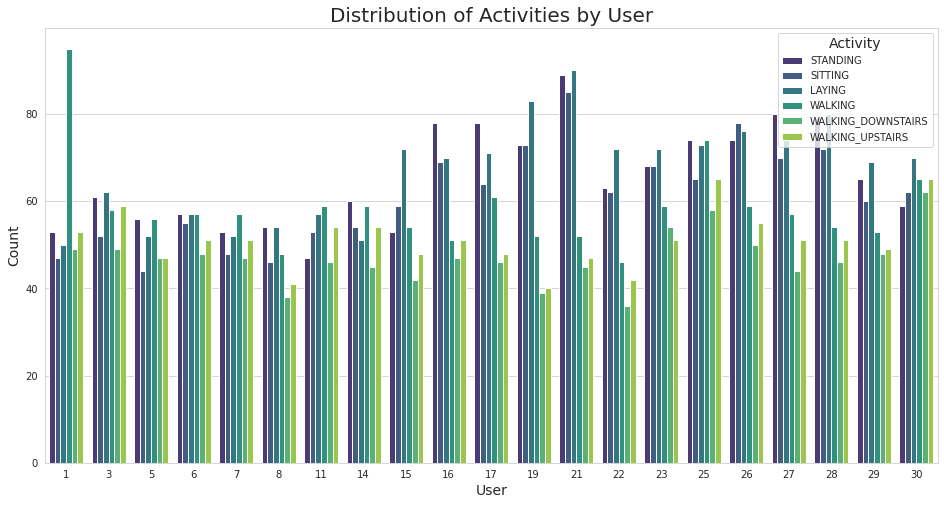

In [139]:
# Set style and font family
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

# Create a figure with a specified size
plt.figure(figsize=(16, 8))

# Set plot title and adjust font size
plt.title('Distribution of Activities by User', fontsize=20)

# Create a count plot with improved color palette and legend
sns.countplot(x='Subject', hue='ActivityName', data=train, palette='viridis')

# Improve legend placement for better readability
plt.legend(title='Activity', title_fontsize='14', loc='upper right')

# Set axis labels and adjust font size
plt.xlabel('User', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

The dataset reveals a notable trend wherein participants have a greater volume of data for walking upstairs compared to walking downstairs. Assuming an equal distribution of both uphill and downhill walks, it becomes evident that participants spend a longer duration walking upstairs.

# ActivityName Distribution

How is the distribution of activity occurrences in this dataset precisely characterized? Let's generate a plot and delve into the analysis.

In [140]:
# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
color_scale = px.colors.sequential.Viridis  # Use a predefined color scale
colors = px.colors.sample_colorscale(color_scale, n)

# Create plot
bar_trace = go.Bar(
    x=label_counts.index,
    y=label_counts,
    marker=dict(color=colors)
)

layout = go.Layout(
    title='Smartphone ActivityName Distribution',
    xaxis=dict(title='ActivityName'),
    yaxis=dict(title='Count')
)

fig = go.Figure(data=[bar_trace], layout=layout)
fig.show()

Despite fluctuations in label counts, the distribution of labels remains fairly even. Assuming participants ascended and descended an equal number of stairs while smartphones maintained a consistent sampling rate, the dataset should reflect an equal number of data points for both upward and downward walking. Setting aside the potential for flawed data, participants appear to walk approximately 10% faster when descending.

# Featuring Engineering

Upon initial observation, it is apparent that static activities may not yield as much information as their dynamic counterparts. To substantiate this assertion, let's employ a visual aid for clarification.

/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-pa

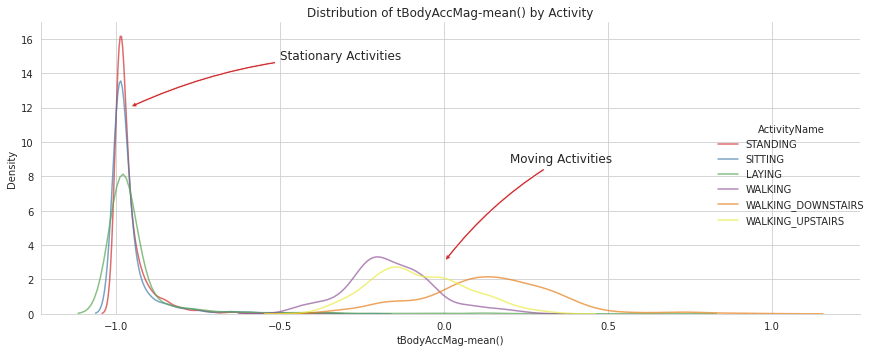

In [141]:
# Set a customized color palette
sns.set_palette("Set1", desat=0.80)

# Create a FacetGrid for better organization
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5, aspect=2)

# Use KDE plot instead of distplot for smoother visualization
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', fill=False, common_norm=False, alpha=0.7)

# Add legend for better readability
facetgrid.add_legend()

# Annotate stationary activities
plt.annotate("Stationary Activities", xy=(-0.960, 12), xytext=(-0.5, 15), size=12,
             va='center', ha='left', arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Annotate moving activities
plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=12,
             va='center', ha='left', arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Improve plot aesthetics
plt.title("Distribution of tBodyAccMag-mean() by Activity")
plt.xlabel("tBodyAccMag-mean()")
plt.ylabel("Density")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Explanation of Above Graph: 
- The first thing to keep in mind that features in X_train.txt are normalized and bounded within [-1,1].
- Now, let's look at the variable we are analyzing. tBodyAccMag-mean() is the mean magnitude of the body acceleration in the time domain. 
- So, at the "-1" end of the graph, this would correspond to a mean magnitude of 0. As we go rightward, this would correspond to an increase in the  mean magnitude of the body acceleration
- We can see that, for stationary data, the mean magnitude of body acceleration is roughly 0. This would correspond to expectations 
- We can see that, for motional data, the mean magnitude of body acceleration is more than 0. This would correspond to expectations. 


In real-world datasets, what is often observed is that the distribution of data during participants' movement tends to follow a normal distribution, albeit with some notable long tails. Notably, the magnitude of dynamic activities is significantly higher than that of stationary activities. 

Now, let's develop a better visual of the distribution of data amidst the activities.

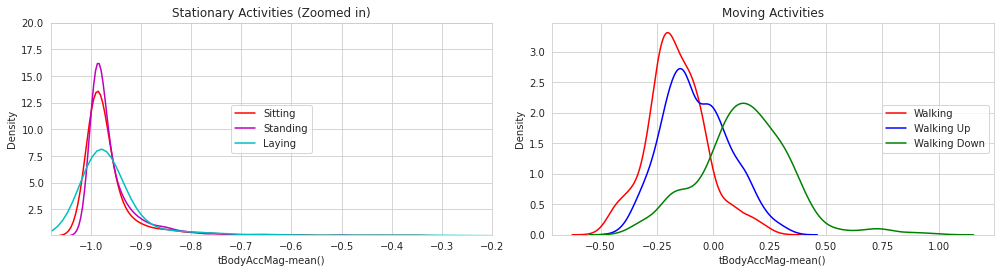

In [142]:
# Create separate dataframes for each activity
activities = {
    1: 'Walking',
    2: 'Walking Up',
    3: 'Walking Down',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

activity_dfs = {activity: train[train['Activity'] == activity] for activity in activities}

# Plotting
plt.figure(figsize=(14, 7))

# Plot for Stationary Activities
plt.subplot(2, 2, 1)
plt.title('Stationary Activities (Zoomed in)')
for activity, color in zip([4, 5, 6], ['r', 'm', 'c']):
    sns.kdeplot(activity_dfs[activity]['tBodyAccMag-mean()'], color=color, label=activities[activity])
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

# Plot for Moving Activities
plt.subplot(2, 2, 2)
plt.title('Moving Activities')
for activity, color in zip([1, 2, 3], ['red', 'blue', 'green']):
    sns.kdeplot(activity_dfs[activity]['tBodyAccMag-mean()'], color=color, label=activities[activity])
plt.legend(loc='center right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The visualizations distinctly illustrate the distribution patterns between Stationary Activities and Moving Activities. Now, the challenge is to precisely differentiate between these activities. One potential approach is to leverage the Magnitude of acceleration as a discriminating factor. To explore this, let's apply a boxplot to visualize and compare the activities.

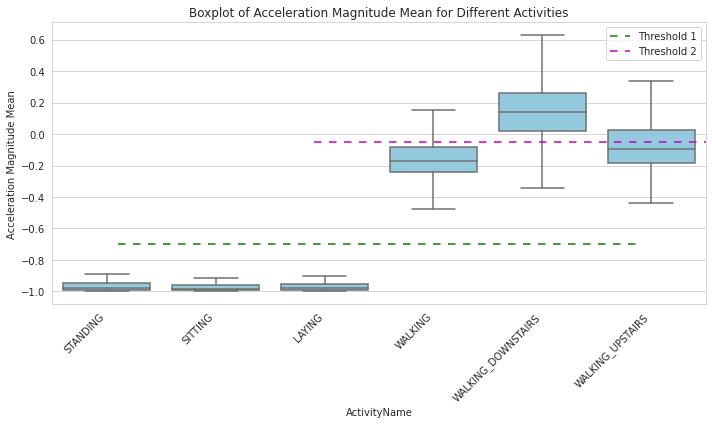

In [143]:
plt.figure(figsize=(10, 6))

# Customize the boxplot
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()', data=train, showfliers=False, color='skyblue')

# Add horizontal lines for reference
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5, 5), color='g', label='Threshold 1')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5, 5), color='m', label='Threshold 2')

# Label the y-axis
plt.ylabel('Acceleration Magnitude Mean')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Set plot title
plt.title('Boxplot of Acceleration Magnitude Mean for Different Activities')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Analyzing the nuanced patterns unveiled by the box plot reveals valuable distinctions. A tAccMean below -0.8 predominantly corresponds to stationary activities like Standing, Sitting, or Laying. Conversely, when tAccMean exceeds -0.6, it signals dynamic activities such as Walking, Walking Downstairs, or Walking Upstairs. Moreover, a tAccMean surpassing 0.0 specifically characterizes the activity as Walking Downstairs. While achieving a commendable 75% classification accuracy for activity labels, there remains a margin for error. The consideration of Gravity Acceleration Components adds an additional layer of relevance to the classification task. Thus, revisiting the plots with respect to these components may yield further insights.

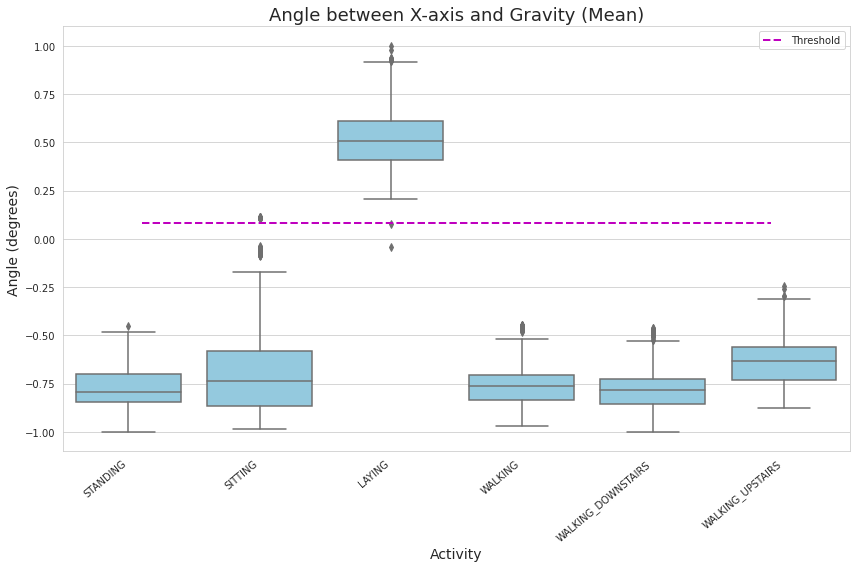

In [144]:
plt.figure(figsize=(12, 8))

# Customize the boxplot
sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train, color='skyblue')

# Add a horizontal line for reference
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, color='m', linestyle='--', linewidth=2, label='Threshold')

# Set plot title and labels
plt.title('Angle between X-axis and Gravity (Mean)', fontsize=18)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Angle (degrees)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In interpreting the presented plot, it can be determined that if angleX,gravityMean is greater than 0, it unequivocally denotes the activity as Laying. Remarkably, all data points corresponding to the Laying activity can be effectively classified using a concise if-else statement. Simarly, plotting for angleY,gravityMean seems to yield a similar consensus.

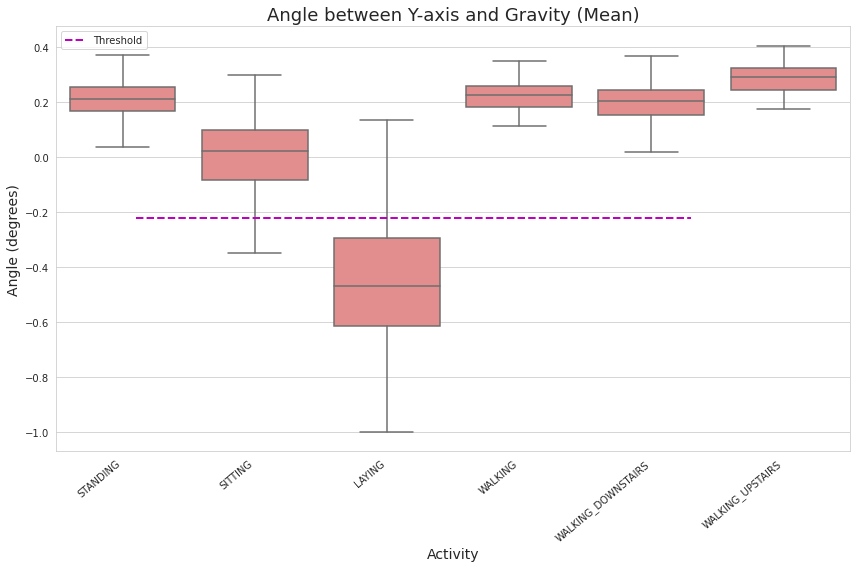

In [145]:
plt.figure(figsize=(12, 8))

# Customize the boxplot
sns.boxplot(x='ActivityName', y='angle(Y,gravityMean)', data=train, showfliers=False, color='lightcoral')

# Add a horizontal line for reference
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, color='m', linestyle='--', linewidth=2, label='Threshold')

# Set plot title and labels
plt.title('Angle between Y-axis and Gravity (Mean)', fontsize=18)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Angle (degrees)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In interpreting the presented plot, it can be determined that if angleY,gravityMean is less than -0.2, it unequivocally denotes the activity as Laying.

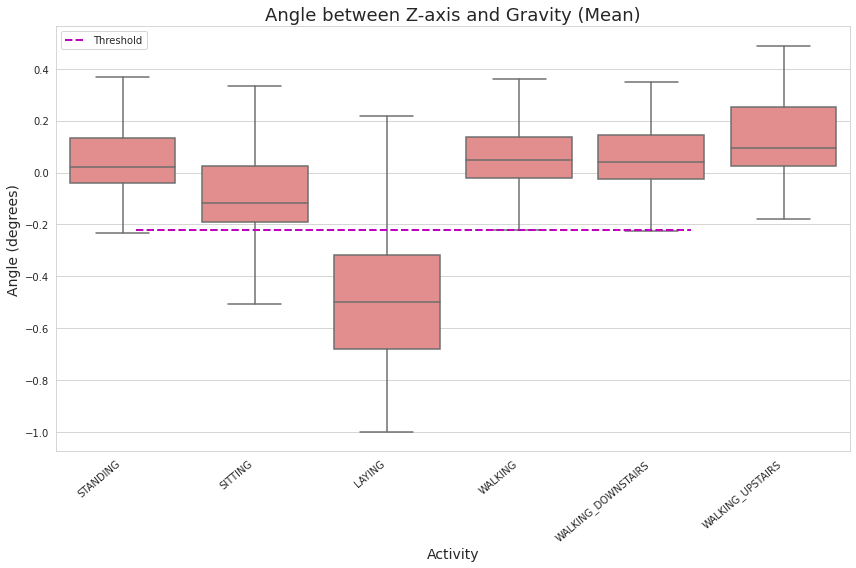

In [146]:
plt.figure(figsize=(12, 8))

# Customize the boxplot
sns.boxplot(x='ActivityName', y='angle(Z,gravityMean)', data=train, showfliers=False, color='lightcoral')

# Add a horizontal line for reference
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, color='m', linestyle='--', linewidth=2, label='Threshold')

# Set plot title and labels
plt.title('Angle between Z-axis and Gravity (Mean)', fontsize=18)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Angle (degrees)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In interpreting the presented plot, it can be determined that if angleY,gravityMean is less than -0.2, it unequivocally denotes the activity as Laying.

# Plot Gyroscope Data

## Mean Body Gyroscope Data - X Axis

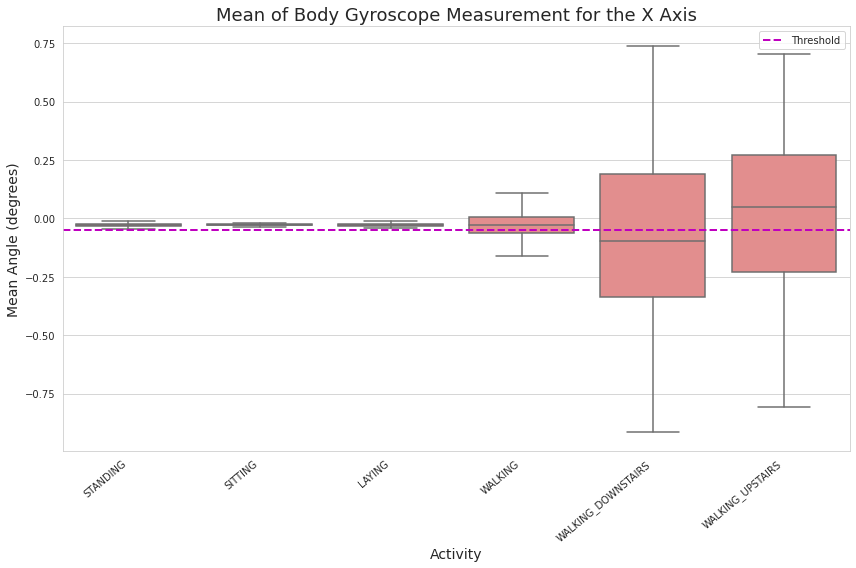

In [147]:
plt.figure(figsize=(12, 8))

# Customize the boxplot
sns.boxplot(x='ActivityName', y='tBodyGyro-mean()-X', data=train, showfliers=False, color='lightcoral')

# Add a horizontal line for reference
plt.axhline(y=-0.05, xmin=0.0, xmax=1.0, color='m', linestyle='--', linewidth=2, label='Threshold')

# Set plot title and labels
plt.title('Mean of Body Gyroscope Measurement for the X Axis', fontsize=18)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Mean Angle (degrees)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

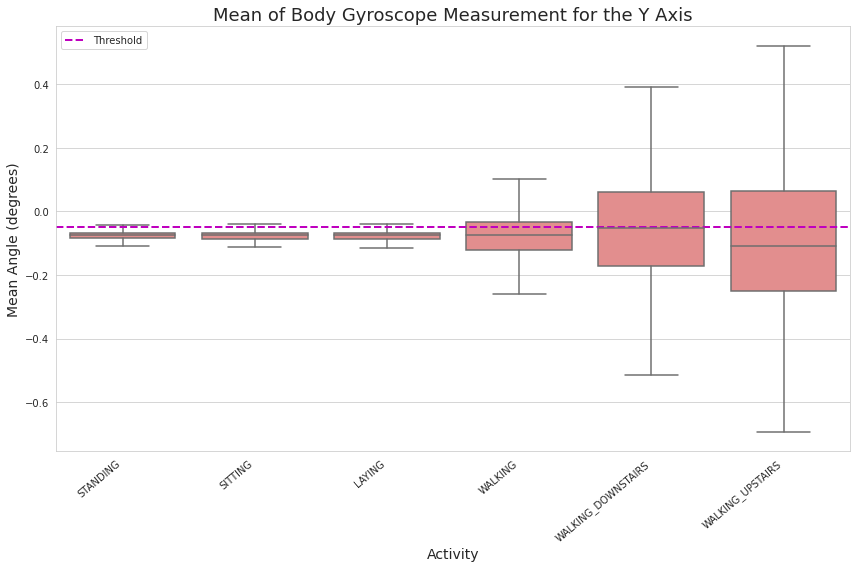

In [148]:
plt.figure(figsize=(12, 8))

# Customize the boxplot
sns.boxplot(x='ActivityName', y='tBodyGyro-mean()-Y', data=train, showfliers=False, color='lightcoral')

# Add a horizontal line for reference
plt.axhline(y=-0.05, xmin=0.0, xmax=1.0, color='m', linestyle='--', linewidth=2, label='Threshold')

# Set plot title and labels
plt.title('Mean of Body Gyroscope Measurement for the Y Axis', fontsize=18)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Mean Angle (degrees)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

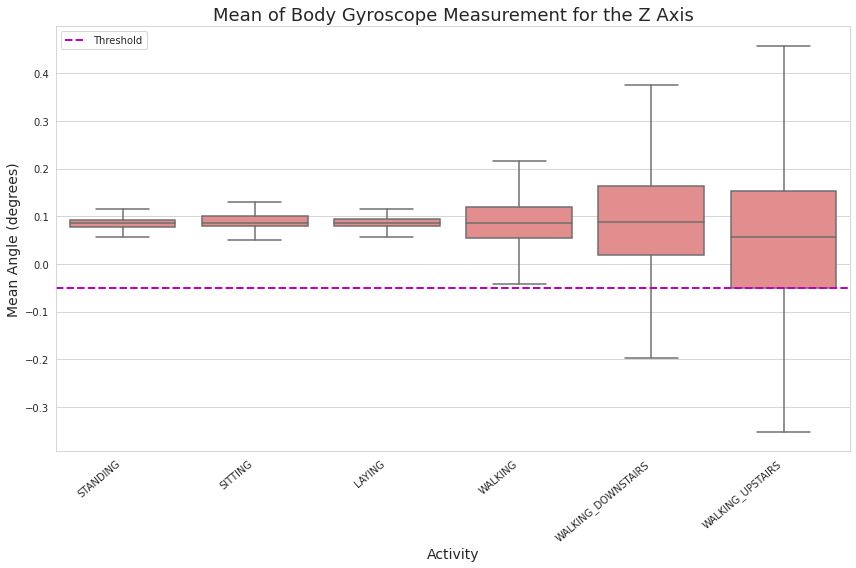

In [149]:
plt.figure(figsize=(12, 8))

# Customize the boxplot
sns.boxplot(x='ActivityName', y='tBodyGyro-mean()-Z', data=train, showfliers=False, color='lightcoral')

# Add a horizontal line for reference
plt.axhline(y=-0.05, xmin=0.0, xmax=1.0, color='m', linestyle='--', linewidth=2, label='Threshold')

# Set plot title and labels
plt.title('Mean of Body Gyroscope Measurement for the Z Axis', fontsize=18)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Mean Angle (degrees)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()